import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


mount drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
url ="/content/drive/My Drive/elevvo internship/task2/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


preprocessing

In [14]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


data visualization

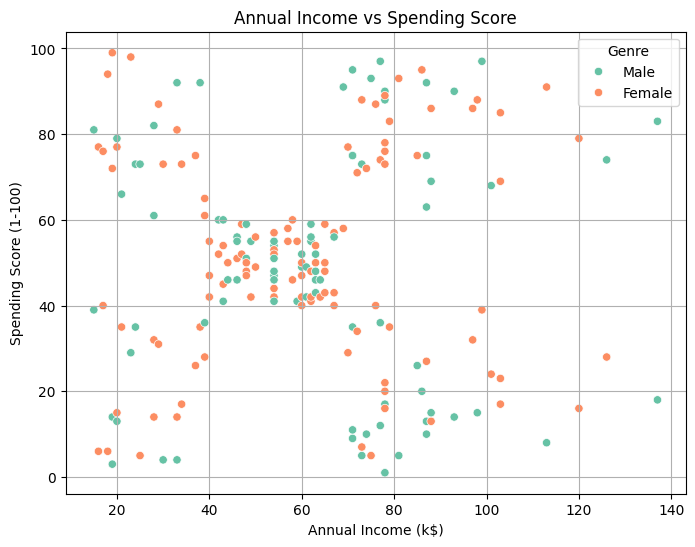

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='Set2')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()


Find Optimal Number of Clusters

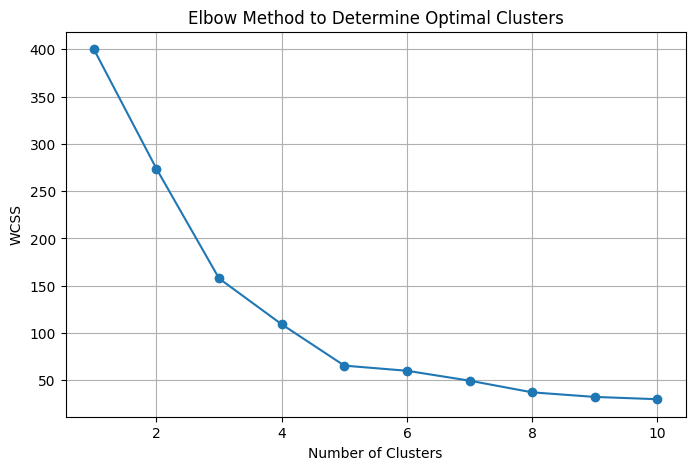

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


k-mean clustering

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster info to original DataFrame
df['Cluster'] = clusters


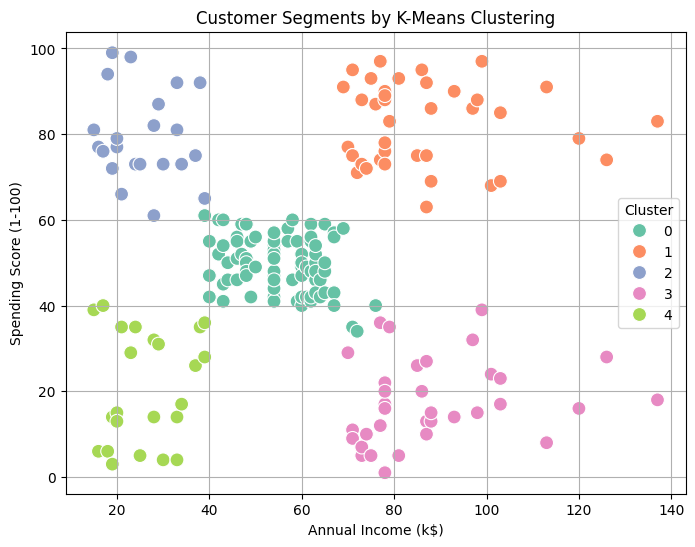

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='Set2',
                s=100)

plt.title('Customer Segments by K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [21]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91


Bonus: DBSCAN Clustering

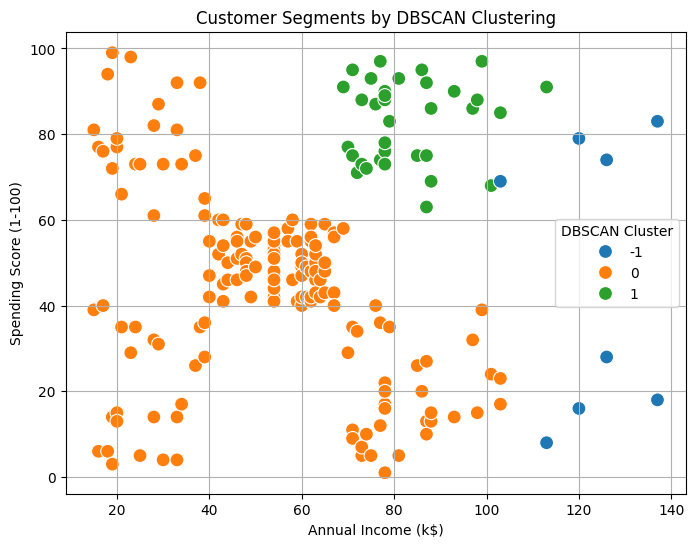

In [23]:
from sklearn.cluster import DBSCAN

# DBSCAN typically works better without scaling to 0 mean for small distances
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_features)

# Add DBSCAN cluster to dataset
df['DBSCAN_Cluster'] = db_clusters

# Visualize DBSCAN result
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['DBSCAN_Cluster'],
                palette='tab10',
                s=100)

plt.title('Customer Segments by DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='DBSCAN Cluster')
plt.grid()
plt.show()
